In [1]:
### import neccessary libraries
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as pyplot
import numpy
from PIL import Image
import os
import json
import pathlib
from colorama import Fore
from datetime import datetime
import pandas
from pprint import pprint
from PIL import Image
from bidict import bidict

In [2]:
### import local libraries
from model import create_model
from preprocessing import preprocess_image_dataset
from  predict import predict 

In [3]:
print(Fore.RED + '#############################################################################################' + Fore.RESET, end="\n")
print(Fore.GREEN + '############################### Image Classification Application ############################' + Fore.RESET, end="\n")
print(Fore.RED + '#############################################################################################' + Fore.RESET, end="\n")


#############################################################################################
############################### Image Classification Application ############################
#############################################################################################


In [4]:
# get root directory
root = pathlib.Path.cwd()

In [5]:
root

WindowsPath('e:/AI/datatype/image/classification/classifier')

In [6]:
### define tensorboard callbacks
log_dir = os.path.join("logs", "fit", datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [7]:
### import hyperparameters
from hyperparameters import (
    IMAGE_SIZE, BATCH_SIZE, EPOCHS, BEST_ACCURACY_MODEL, DATASET_PATH, TRAIN_FOLDER
)

In [8]:
### read cvs file which contains the image file names and their corresponding labels
dataframe = pandas.read_csv(f'{DATASET_PATH}\\Training_set.csv')
dataframe = pandas.DataFrame(dataframe)

In [9]:
### get the unique classes
classes = dataframe["label"].unique()
# print out the number of image paths
print(Fore.GREEN + '### Label names: ' + Fore.RESET, end="")
pprint(classes)

### Label names: array(['SOUTHERN DOGFACE', 'ADONIS', 'BROWN SIPROETA', 'MONARCH',
       'GREEN CELLED CATTLEHEART', 'CAIRNS BIRDWING',
       'EASTERN DAPPLE WHITE', 'RED POSTMAN', 'MANGROVE SKIPPER',
       'BLACK HAIRSTREAK', 'CABBAGE WHITE', 'RED ADMIRAL', 'PAINTED LADY',
       'PAPER KITE', 'SOOTYWING', 'PINE WHITE', 'PEACOCK',
       'CHECQUERED SKIPPER', 'JULIA', 'COMMON WOOD-NYMPH', 'BLUE MORPHO',
       'CLOUDED SULPHUR', 'STRAITED QUEEN', 'ORANGE OAKLEAF',
       'PURPLISH COPPER', 'ATALA', 'IPHICLUS SISTER', 'DANAID EGGFLY',
       'LARGE MARBLE', 'PIPEVINE SWALLOW', 'BLUE SPOTTED CROW',
       'RED CRACKER', 'QUESTION MARK', 'CRIMSON PATCH', 'BANDED PEACOCK',
       'SCARCE SWALLOW', 'COPPER TAIL', 'GREAT JAY', 'INDRA SWALLOW',
       'VICEROY', 'MALACHITE', 'APPOLLO', 'TWO BARRED FLASHER',
       'MOURNING CLOAK', 'TROPICAL LEAFWING', 'POPINJAY', 'ORANGE TIP',
       'GOLD BANDED', 'BECKERS WHITE', 'RED SPOTTED PURPLE',
       'MILBERTS TORTOISESHELL', 'SILVER SPOT SKIPP

In [10]:
### change the image path to the absolute path
def modify_image_path(filename):
    return DATASET_PATH + '/' + TRAIN_FOLDER + '/' + filename

dataframe['filename'] = dataframe['filename'].apply(modify_image_path)

In [11]:
### print out the first 10 rows of the dataframe
print(Fore.GREEN + '### Display 10 sample row' + Fore.RESET)
dataframe.head(10)

### Display 10 sample row


,filename,label
0,e:\AI\datatype\image\classification\classifier...,SOUTHERN DOGFACE
1,e:\AI\datatype\image\classification\classifier...,ADONIS
2,e:\AI\datatype\image\classification\classifier...,BROWN SIPROETA
3,e:\AI\datatype\image\classification\classifier...,MONARCH
4,e:\AI\datatype\image\classification\classifier...,GREEN CELLED CATTLEHEART
5,e:\AI\datatype\image\classification\classifier...,CAIRNS BIRDWING
6,e:\AI\datatype\image\classification\classifier...,GREEN CELLED CATTLEHEART
7,e:\AI\datatype\image\classification\classifier...,EASTERN DAPPLE WHITE
8,e:\AI\datatype\image\classification\classifier...,BROWN SIPROETA
9,e:\AI\datatype\image\classification\classifier...,RED POSTMAN


### Display 5 images for testing


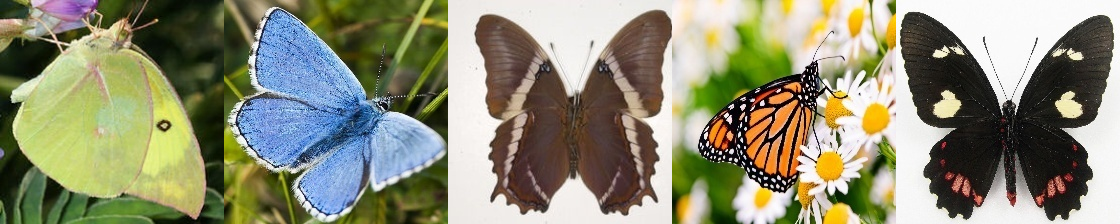

In [12]:
### Load your images for testing
image1 = Image.open(dataframe.iloc[0].filename)
image2 = Image.open(dataframe.iloc[1].filename)
image3 = Image.open(dataframe.iloc[2].filename)
image4 = Image.open(dataframe.iloc[3].filename)
image5 = Image.open(dataframe.iloc[4].filename)

# Get the dimensions of the images
width, height = image1.size

# Create a new blank image with a width that can contain all 5 images
total_width = width * 5
combined_image = Image.new('RGB', (total_width, height))

# Paste the images into the new blank image
combined_image.paste(image1, (0, 0))
combined_image.paste(image2, (width, 0))
combined_image.paste(image3, (width * 2, 0))
combined_image.paste(image4, (width * 3, 0))
combined_image.paste(image5, (width * 4, 0))

# Show the combined image
print(Fore.GREEN + '### Display 5 images for testing' + Fore.RESET)
combined_image

In [13]:
### get the shape of the image
image2 = Image.open(dataframe.iloc[1].filename)
math_image = numpy.array(image2)
image_shape = math_image.shape
print(Fore.GREEN + '### Shape of an image: ' + Fore.RESET, end='')
print(image_shape)

### Shape of an image: (224, 224, 3)


In [14]:
### create bimap for classes
bimap = bidict()

# iterate through classes and add them to the bidict
for i, c in enumerate(classes):
    bimap[c] = i

with open('bimap.json', 'w') as json_file:
    json.dump(dict(bimap), json_file, indent=4)  # `indent=4` for pretty printing

print(Fore.GREEN + '### Class name map: ' + Fore.RESET)
pprint(bimap)

### Class name map: 
bidict({'SOUTHERN DOGFACE': 0, 'ADONIS': 1, 'BROWN SIPROETA': 2, 'MONARCH': 3, 'GREEN CELLED CATTLEHEART': 4, 'CAIRNS BIRDWING': 5, 'EASTERN DAPPLE WHITE': 6, 'RED POSTMAN': 7, 'MANGROVE SKIPPER': 8, 'BLACK HAIRSTREAK': 9, 'CABBAGE WHITE': 10, 'RED ADMIRAL': 11, 'PAINTED LADY': 12, 'PAPER KITE': 13, 'SOOTYWING': 14, 'PINE WHITE': 15, 'PEACOCK': 16, 'CHECQUERED SKIPPER': 17, 'JULIA': 18, 'COMMON WOOD-NYMPH': 19, 'BLUE MORPHO': 20, 'CLOUDED SULPHUR': 21, 'STRAITED QUEEN': 22, 'ORANGE OAKLEAF': 23, 'PURPLISH COPPER': 24, 'ATALA': 25, 'IPHICLUS SISTER': 26, 'DANAID EGGFLY': 27, 'LARGE MARBLE': 28, 'PIPEVINE SWALLOW': 29, 'BLUE SPOTTED CROW': 30, 'RED CRACKER': 31, 'QUESTION MARK': 32, 'CRIMSON PATCH': 33, 'BANDED PEACOCK': 34, 'SCARCE SWALLOW': 35, 'COPPER TAIL': 36, 'GREAT JAY': 37, 'INDRA SWALLOW': 38, 'VICEROY': 39, 'MALACHITE': 40, 'APPOLLO': 41, 'TWO BARRED FLASHER': 42, 'MOURNING CLOAK': 43, 'TROPICAL LEAFWING': 44, 'POPINJAY': 45, 'ORANGE TIP': 46, 'GOLD BANDED'

In [15]:
### get data from the pandas dataframe
dataframe['number_label'] = dataframe['label'].map(bimap)

features = dataframe['filename'].values 
labels = dataframe['number_label'].values

# print out the number of image paths
print(Fore.GREEN + '### number of image paths: ' + Fore.RESET, end="")
pprint(len(features))

# print out the number of image paths
print(Fore.GREEN + '### number of labels: ' + Fore.RESET, end="")
pprint(len(labels))

### number of image paths: 6499
### number of labels: 6499


In [16]:
# # Define an ImageDataGenerator with various augmentations
# datagen = keras.preprocessing.image.ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

In [17]:
### preprocess data
train_dataset, train_dataset_size = preprocess_image_dataset(features, labels, IMAGE_SIZE, BATCH_SIZE)

In [18]:
# Get the number of batches
num_batches = tensorflow.data.experimental.cardinality(train_dataset).numpy()

# Calculate total number of elements in the train dataset
total_elements_in_train = sum(1 for _ in train_dataset.unbatch())

# # Calculate total number of elements in the train dataset
# total_elements_in_validation = sum(1 for _ in validation_dataset.unbatch())

# print out the number of batches
print(Fore.GREEN + '### number of batches: ' + Fore.RESET, end="")
pprint(num_batches)

# print out the number of items in the dataset
print(Fore.GREEN + '### number of items in train dataset: ' + Fore.RESET, end="")
pprint(total_elements_in_train)

# # print out the number of items in the dataset
# print(Fore.GREEN + '### number of items in validation dataset: ' + Fore.RESET, end="")
# pprint(total_elements_in_validation)

### number of batches: 204
### number of items in train dataset: 6499


In [19]:
### create the model
model = create_model(image_shape, len(classes))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [20]:
### steps: choose optimizer and loss function
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [21]:
### prepare for saving point
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=BEST_ACCURACY_MODEL,
    save_weights_only=False,  # Set to False to save the entire model
    verbose=1,
    save_best_only=True, # Save only when the metric improves 
    monitor='val_loss', # Monitor the validation loss 
    mode='min' # Save model with the minimum validation loss
)

In [22]:
### train the model
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    # validation_data=validation_dataset,
    # validation_batch_size=BATCH_SIZE,
    callbacks=[tensorboard_callback, checkpoint_callback],
    verbose=1
)

Epoch 1/5
204/204 [==============================] - 47s 214ms/step - loss: 3.2553 - accuracy: 0.2140
Epoch 2/5
204/204 [==============================] - 34s 167ms/step - loss: 1.5327 - accuracy: 0.5816
Epoch 3/5
204/204 [==============================] - 41s 199ms/step - loss: 0.5949 - accuracy: 0.8317
Epoch 4/5
204/204 [==============================] - 25s 121ms/step - loss: 0.2703 - accuracy: 0.9240
Epoch 5/5
204/204 [==============================] - 41s 198ms/step - loss: 0.1494 - accuracy: 0.9586


Training accuracy: [0.21403293311595917, 0.5816279649734497, 0.8316664099693298, 0.9239882826805115, 0.9586090445518494]


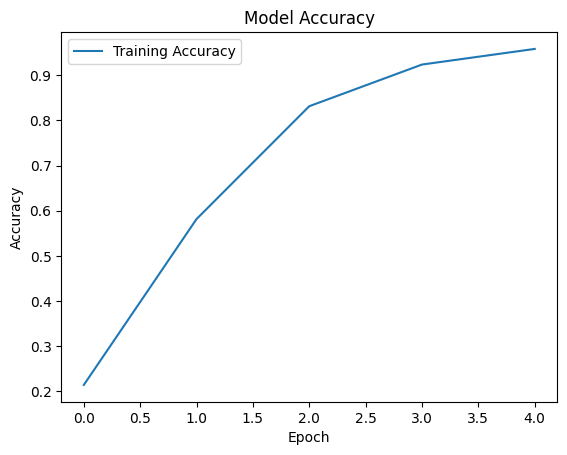

In [23]:
### train accuracy
train_accuracy = history.history['accuracy']  # Training accuracy across epochs
print(f"Training accuracy: {train_accuracy}")

pyplot.plot(history.history['accuracy'], label='Training Accuracy')
pyplot.title('Model Accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(loc='upper left')
pyplot.show()

In [24]:
### steps: evaluate model
test_loss, test_accuracy = model.evaluate(train_dataset)

print(Fore.GREEN + "Test Accuracy: " + Fore.RESET + "{}".format(test_accuracy * 100))
print(Fore.GREEN + "Test Accuracy: " + Fore.RESET + "{}".format(test_accuracy * 100))

204/204 [==============================] - 4s 16ms/step - loss: 0.0497 - accuracy: 0.9869
Test Accuracy: 98.69210720062256
Test Accuracy: 98.69210720062256


In [25]:
### step: load the trained model
best_accuracy_model = keras.models.load_model(BEST_ACCURACY_MODEL)
print(best_accuracy_model.summary())

OSError: No file or directory found at checkpoints\best_accuracy_model_at_25-01-01.keras

In [26]:
### test for predicting image label
image_path = dataframe.iloc[0].filename
label = dataframe.iloc[0].label

### Display image to be tested 
### Label: SOUTHERN DOGFACE


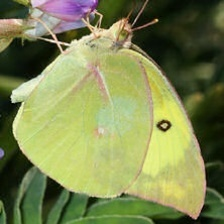

In [27]:
### display image to be tested
print(Fore.GREEN + "### Display image to be tested " + Fore.RESET)
print(Fore.RED + "### Label: " + Fore.RESET, end="")
print(dataframe.iloc[0].label)
Image.open(image_path)

In [28]:
### predict image label
probs, classes = predict(image_path=image_path, model=best_accuracy_model, top_k=5)

1/1 [==============================] - 0s 224ms/step


In [29]:
# Print results
predictions = []
print(Fore.GREEN + "Image:" + Fore.RESET + " {}".format(image_path))
print(Fore.RED + "Predictions:" + Fore.RESET)
print("************************************************")
for prob, class_name in zip(probs, classes):
    print(Fore.GREEN + "Class: " + Fore.RESET + f"{class_name}".format(class_name), end="\n")
    print(Fore.GREEN + "Class name: " + Fore.RESET + f"{bimap.inverse[class_name]}".format(class_name), end="\n")
    print(Fore.RED + "Score: " + Fore.RESET + f"{prob:.4f}".format(prob), end="\n")
    print("************************************************")
    predictions.append({
        'class_index': class_name,
        'class_name': bimap.inverse[class_name],
        'score': prob
    })

Image: e:\AI\datatype\image\classification\classifier\butterfly-image-classification/train/Image_1.jpg
Predictions:
************************************************
Class: 0
Class name: SOUTHERN DOGFACE
Score: 0.6878
************************************************
Class: 44
Class name: TROPICAL LEAFWING
Score: 0.2436
************************************************
Class: 69
Class name: CLEOPATRA
Score: 0.0258
************************************************
Class: 21
Class name: CLOUDED SULPHUR
Score: 0.0135
************************************************
Class: 10
Class name: CABBAGE WHITE
Score: 0.0104
************************************************


In [30]:
assert label == predictions[0]['class_name']